In [1]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt


/home/anupam/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 22s 2us/step


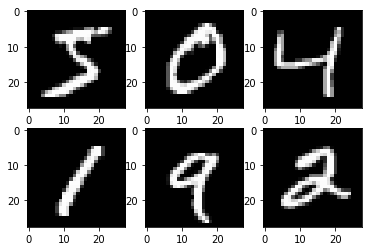

In [8]:
# plot 6 images as gray scale
plt.subplot(231)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(232)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(233)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(234)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(235)
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
plt.subplot(236)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [9]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

from keras.utils import np_utils

In [11]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [17]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [18]:


# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


In [19]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [20]:


# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [21]:


# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


In [22]:


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 0.2783 - acc: 0.9209 - val_loss: 0.1412 - val_acc: 0.9572
Epoch 2/10
 - 11s - loss: 0.1117 - acc: 0.9677 - val_loss: 0.0924 - val_acc: 0.9704
Epoch 3/10
 - 10s - loss: 0.0721 - acc: 0.9794 - val_loss: 0.0782 - val_acc: 0.9774
Epoch 4/10
 - 10s - loss: 0.0506 - acc: 0.9855 - val_loss: 0.0745 - val_acc: 0.9775
Epoch 5/10
 - 11s - loss: 0.0376 - acc: 0.9894 - val_loss: 0.0676 - val_acc: 0.9791
Epoch 6/10
 - 12s - loss: 0.0270 - acc: 0.9927 - val_loss: 0.0630 - val_acc: 0.9803
Epoch 7/10
 - 10s - loss: 0.0213 - acc: 0.9947 - val_loss: 0.0625 - val_acc: 0.9812
Epoch 8/10
 - 11s - loss: 0.0142 - acc: 0.9969 - val_loss: 0.0627 - val_acc: 0.9807
Epoch 9/10
 - 11s - loss: 0.0111 - acc: 0.9977 - val_loss: 0.0595 - val_acc: 0.9809
Epoch 10/10
 - 10s - loss: 0.0081 - acc: 0.9984 - val_loss: 0.0591 - val_acc: 0.9816
Baseline Error: 1.84%


In [23]:
X_test


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([[2.6878011e-09, 2.6784150e-09, 4.9437855e-08, ..., 9.9996412e-01,
        5.3735977e-08, 2.9404423e-06],
       [7.5804446e-10, 4.9715129e-07, 9.9999940e-01, ..., 7.8210798e-16,
        1.7013132e-07, 4.0770687e-14],
       [1.3229037e-08, 9.9995077e-01, 6.1714750e-06, ..., 7.4882446e-06,
        3.2683332e-05, 3.3903593e-08],
       ...,
       [5.4468708e-15, 9.7528027e-12, 4.1530974e-15, ..., 7.4795139e-09,
        2.5664479e-09, 3.7423487e-07],
       [6.0145733e-10, 4.1597396e-11, 5.4678120e-11, ..., 2.0606763e-09,
        4.8460897e-05, 2.5891003e-11],
       [1.6606847e-09, 3.9114193e-13, 1.4509711e-10, ..., 6.4534352e-15,
        3.3014578e-12, 7.3537634e-12]], dtype=float32)